# Module 2: Data Analysis

## Sprint 2: Inferential Statistical Analysis

## Part 5: Inferential Statistical Analysis of the Podcast Reviews


## About this Part

Congrats!
You have reached the last Part of this Sprint.
In this Part, you will put what you learned during this and the previous Sprints into practice.
As the final assignment of this Sprint, you will analyze the Podcast Reviews Dataset.
You will have to apply all that you have learned about Statistical Inference & SQL to complete this task.
Our expectation is that you'll use your own judgment on how to perform the analysis and how to select the most important avenues of statistical testing and exploration.
You'll have to iteratively raise hypotheses and use your data analysis skills to get answers.

P.S. we don't expect this project to be perfect - you will continue to improve your skills and there will be many projects for you to apply your newly gained skills in the future.
For now, just use what you have learned and try your best!

## Objectives for this Part

- Practice working with SQLite datasets.
- Practice performing EDA.
- Practice applying statistical inference procedures.
- Practice visualizing data with Matplotlib & Seaborn.
- Practice creating dashboards with Google Data Studio.
- Practice reading data, performing queries, and filtering data using SQL and Pandas.

## Requirements

- Download the data from [Podcast Reviews Dataset](https://www.kaggle.com/datasets/thoughtvector/podcastreviews/versions/28).
- Load the data using SQLite and Pandas.
- Perform exploratory data analysis. This should include creating statistical summaries and charts, testing for anomalies, checking for correlations and other relations between variables, and other EDA elements.
- Perform statistical inference. This should include defining the target population, forming multiple statistical hypotheses and constructing confidence intervals, setting the significance levels, and conducting z or t-tests for these hypotheses.
- Create a Google Data Studio dashboard with at least three different types of charts.
- Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results did you get, and what these results mean.
- Provide suggestions about how your analysis can be improved.

## Evaluation Criteria

- Adherence to the requirements. How well did you meet the requirements?
- Depth of your analysis. Did you just skim the surface, or did you explore the dataset in depth?
- Visualization quality. Did you use charts effectively to visualize patterns in the data? Are your visualizations properly labeled? Did you use colors effectively? Did you adhere to the principle of proportional ink?
- Code quality. Was your code well-structured? Did you use the appropriate levels of abstraction? Did you remove commented-out and unused code? Did you adhere to the PEP8?
- Code performance. Did you use suitable algorithms and data structures to solve the problems?

## Correction

During your project correction, you should present your project as if talking to a product manager and senior data analyst working in your team.
You will have to find the right balance between explaining the business side and the technical aspects of your work.
You can assume that both of your colleagues have a strong understanding of and are very interested in the business aspect of your project, so be sure to clearly explain what new insights you've found while analyzing the dataset and which directions look the most promising for further research.
However, you should also spend time explaining the technical aspects of your work, especially the more complex or unconventional choices.

During a correction, you may get asked questions that test your understanding of covered topics.

- Explain how to perform a permutation procedure
- What is the difference between a parameter and a statistic?
- What is a confidence interval?
- Why is it risky to assume a normal distribution?
- Why do we need to have control groups, while doing A/B testing?


## General Correction Guidelines

For an in-depth explanation about how corrections work at Turing College, please read [this doc](https://turingcollege.atlassian.net/wiki/spaces/DLG/pages/537395951/Peer+expert+reviews+corrections).


In [1]:
!pip install duckdb -q
!pip install --upgrade duckdb -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 67.2 MB/s eta 0:00:00


In [2]:
! gdown --id 1Utv6rrhK438i6RSVm6TSB-qQOqmf3TaQ

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Utv6rrhK438i6RSVm6TSB-qQOqmf3TaQ
To: /content/database.sqlite
100% 836M/836M [00:14<00:00, 58.6MB/s]


In [3]:
! gdown --id 15GvgJ2hOwNU30F3-YkYfF9NVWUJdhorl

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=15GvgJ2hOwNU30F3-YkYfF9NVWUJdhorl
To: /content/title_count.jpg
100% 56.5k/56.5k [00:00<00:00, 76.4MB/s]


In [4]:
!pip install --upgrade scipy -q

In [5]:
import sqlite3
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
import numpy as np
import sqlite3
import csv

In [6]:
sqlite_conn = sqlite3.connect('/content/database.sqlite')
sqlite_conn.execute("CREATE INDEX idx_categories_podcast_id ON categories(podcast_id)")
sqlite_conn.execute("CREATE INDEX idx_podcasts_podcast_id ON podcasts(podcast_id)")
sqlite_conn.execute("CREATE INDEX idx_reviews_podcast_id ON reviews(podcast_id)")

sqlite_conn.commit()
#sqlite_conn.close()

In [7]:
categories_df = pd.read_sql_query("SELECT * FROM categories", sqlite_conn)
podcasts_df = pd.read_sql_query("SELECT * FROM podcasts", sqlite_conn)
reviews_df = pd.read_sql_query("SELECT * FROM reviews", sqlite_conn)
runs_df = pd.read_sql_query("SELECT * FROM runs", sqlite_conn)


In [8]:
duckdb_conn = duckdb.connect()

duckdb_conn.register("categories", categories_df)
duckdb_conn.register("podcasts", podcasts_df)
duckdb_conn.register("reviews", reviews_df)
duckdb_conn.register("runs", runs_df);


###Overview of the Data

In [9]:
categories = """ SELECT * FROM categories """

podcasts = """SELECT * FROM podcasts """

reviews = """ SELECT * FROM reviews """

runs = """ SELECT * FROM runs """

queries = {"categories":categories, "podcasts": podcasts, "reviews": reviews,"runs" : runs }
dataframes = {}
for key, query in queries.items():
  result = duckdb_conn.execute(query)
  data = result.fetchall()
  columns = [desc[0] for desc in result.description]
  dataframes[f"df_{key}"] = pd.DataFrame(data, columns=columns)
  print(dataframes[f"df_{key}"].head())
  print("----------------------------------------------------------")

                         podcast_id              category
0  c61aa81c9b929a66f0c1db6cbe5d8548                  arts
1  c61aa81c9b929a66f0c1db6cbe5d8548  arts-performing-arts
2  c61aa81c9b929a66f0c1db6cbe5d8548                 music
3  ad4f2bf69c72b8db75978423c25f379e                  arts
4  ad4f2bf69c72b8db75978423c25f379e           arts-design
----------------------------------------------------------
                         podcast_id   itunes_id  \
0  a00018b54eb342567c94dacfb2a3e504  1313466221   
1  a00043d34e734b09246d17dc5d56f63c   158973461   
2  a0004b1ef445af9dc84dad1e7821b1e3   139076942   
3  a00071f9aaae9ac725c3a586701abf4d  1332508972   
4  a000a500f06555f81220c3eb641aded7  1544900779   

                                    slug  \
0                         scaling-global   
1  cornerstone-baptist-church-of-orlando   
2            mystery-dancing-in-the-dark   
3                      kts-money-matters   
4       word-on-the-street-w-dreak-swift   

                     

###Check if there are any missing values and dublicates in the DataFrame

In [10]:
for key, df in dataframes.items():
  print(f"{key} have {len(df)} observations.")
  print(f"{key} have {int(df.isnull().any().any())} null values.")
  print(f"{key} have {df.duplicated().sum()} duplicates.")


df_categories have 212372 observations.
df_categories have 0 null values.
df_categories have 0 duplicates.
df_podcasts have 110024 observations.
df_podcasts have 0 null values.
df_podcasts have 0 duplicates.
df_reviews have 2067529 observations.
df_reviews have 0 null values.
df_reviews have 655 duplicates.
df_runs have 16 observations.
df_runs have 0 null values.
df_runs have 0 duplicates.


### Join tables

In order to make the process smooth, let's merge the table

In [11]:
query = """
SELECT COALESCE(c.podcast_id, r.podcast_id) AS podcast_id,
       c.category,
       r.title AS rating_title,
       r.content,
       r.rating,
       r.author_id,
       r.created_at
FROM categories c
FULL JOIN reviews r ON c.podcast_id = r.podcast_id
"""
chunk_size  = 250000
data = []
offset = 0

while True:
    query_chunk = f"{query} LIMIT {chunk_size} OFFSET {offset}"
    result = duckdb_conn.execute(query_chunk)
    chunk_data = result.fetchall()
    if len(chunk_data) == 0:
        break

    data.extend(chunk_data)
    offset += chunk_size

columns = [desc[0] for desc in result.description]
df = pd.DataFrame(data, columns=columns)
duckdb_conn.close()

print(df.head());

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

                         podcast_id              category  \
0  c61aa81c9b929a66f0c1db6cbe5d8548                  arts   
1  c61aa81c9b929a66f0c1db6cbe5d8548  arts-performing-arts   
2  c61aa81c9b929a66f0c1db6cbe5d8548                 music   
3  ad4f2bf69c72b8db75978423c25f379e                  arts   
4  ad4f2bf69c72b8db75978423c25f379e           arts-design   

                                       rating_title  \
0  Must listen for anyone interested in the arts!!!   
1  Must listen for anyone interested in the arts!!!   
2  Must listen for anyone interested in the arts!!!   
3                                           Until..   
4                                           Until..   

                                             content  rating        author_id  \
0  Super excited to see this podcast grow. So man...       5  F6BF5472689BD12   
1  Super excited to see this podcast grow. So man...       5  F6BF5472689BD12   
2  Super excited to see this podcast grow. So man...       

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4553715 entries, 0 to 4553714
Data columns (total 7 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   podcast_id    object
 1   category      object
 2   rating_title  object
 3   content       object
 4   rating        int64 
 5   author_id     object
 6   created_at    object
dtypes: int64(1), object(6)
memory usage: 243.2+ MB


##Exploratory Data Analysis

In order to understand the dataset better, the following EDA investigation can be undertaken:

1. Distribution of Categories
2. Podcast Ratings
3. Reviews Analysis
4. Statistical Inference
5. Analysis using Google Studio.




### 1. Distribution of Categories

The distribution of categories can be done either by
* Exploring the distribution of podcasts across different categories or
* Determining which categories have the highest number of podcasts.

In [13]:
df["category"].value_counts()


society-culture        441873
comedy                 350849
education              221829
business               210082
news                   180552
                        ...  
science-chemistry         162
science-mathematics       162
sports-swimming           130
sports-volleyball         103
sports-cricket             84
Name: category, Length: 110, dtype: int64

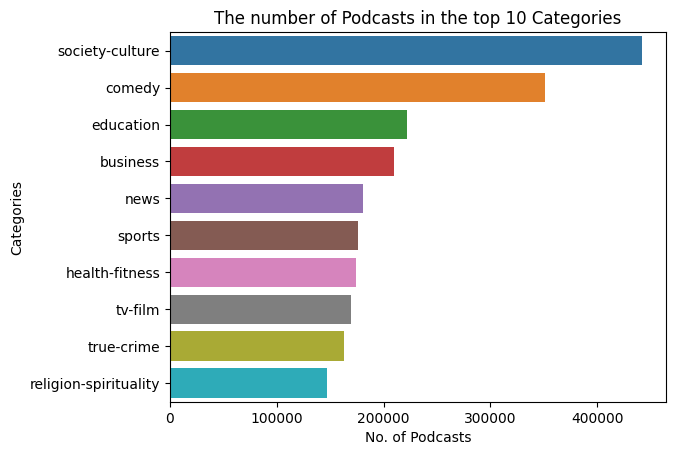

In [14]:
top_categories = df['category'].value_counts().nlargest(10).index

df_1 = df[df['category'].isin(top_categories)]
category_order = df_1['category'].value_counts().index
ax = sns.countplot(y="category", data=df_1, order = category_order)
ax.set_xlabel("No. of Podcasts")
ax.set_ylabel("Categories")
ax.set_title("The number of Podcasts in the top 10 Categories");

*The Category with the higest number of podcasts is society-culture followed by comedy and education.*

### 2. Podcast Ratings

When analyzing the distribution of podcast ratings, we can calculate summary statistics such as the mean, median, and mode. This will help us get a sense of the central tendency and variability of the ratings. Additionally, visualizing the ratings using histograms or box plots can provide a graphical representation of the rating distribution, helping identify any outliers or patterns in the data.

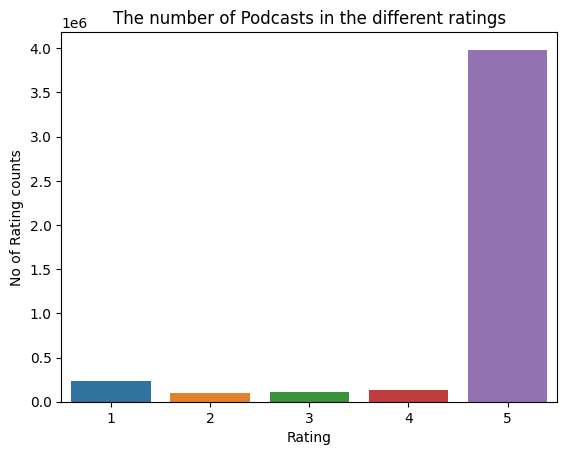

In [15]:
ax2 = sns.countplot(x="rating", data=df)
ax2.set_xlabel("Rating")
ax2.set_ylabel("No of Rating counts")
ax2.set_title("The number of Podcasts in the different ratings");

*The majority of the podcasts has 5 star rating.*

In [16]:
df.describe()

,rating
count,4.553715e+06
mean,4.653789e+00
std,1.010553e+00
min,1.000000e+00
25%,5.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


*The result above shows that mean, median and standard deviation are 4.65, 5, and 1 respectively.*

In [17]:
df_pdts_revs=dataframes["df_podcasts"].merge(dataframes["df_reviews"],
                                             on=["podcast_id"],suffixes=('_pdts', '_revs'))
pdts_revs_5=df_pdts_revs[df_pdts_revs["rating"]==5]
result_pdts_revs_5 = pdts_revs_5.groupby("title_pdts").agg(
    {"rating": "count"}).sort_values(by="rating", ascending=False).reset_index().head(10)
result_pdts_revs_5



,title_pdts,rating
0,Crime Junkie,24927
1,Wow in the World,8590
2,Story Pirates,6532
3,My Favorite Murder with Karen Kilgariff and Ge...,6131
4,True Crime Obsessed,5527
5,The Ben Shapiro Show,5402
6,Know Your Aura with Mystic Michaela,5015
7,Crime in Sports,4980
8,FantasyPros - Fantasy Football Podcast,4277
9,Wine & Crime,4105


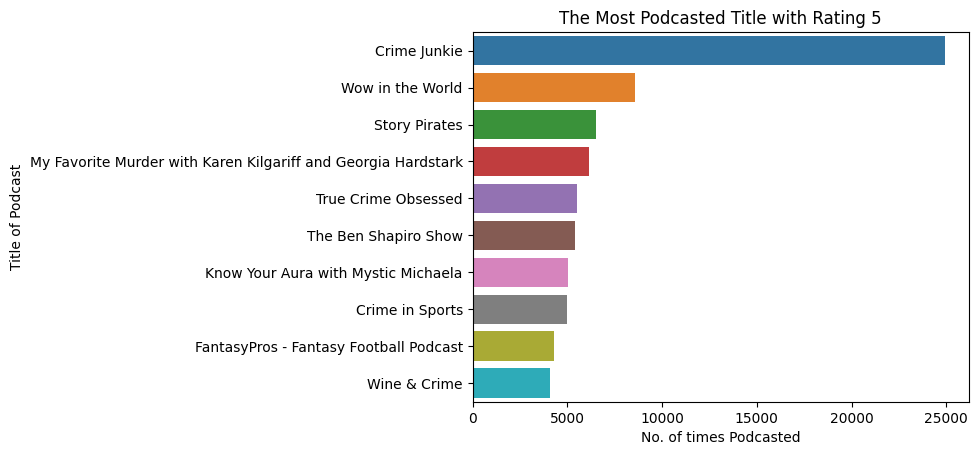

In [18]:
ax22=sns.barplot(y="title_pdts", x="rating", data=result_pdts_revs_5)
ax22.set_xlabel("No. of times Podcasted")
ax22.set_ylabel("Title of Podcast")
ax22.set_title("The Most Podcasted Title with Rating 5");

From the above plot, it shows that Crime Junkie whichi have 5 rating has been podcasted 25000 times from 2005 to 2023. The Crime Junkie has been podcasted almost three times the runner up.

##3. Reviews Analysis

There are different approaches that can be taken to do the review analysis. The path I have chosen to investigate are as follows:

   - Investigate the relationship between the number of reviews added and the time.
   - Determine if there is any correlation between podcast ratings and the number of reviews added.

In [19]:
df["date"]=pd.to_datetime(df["created_at"])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

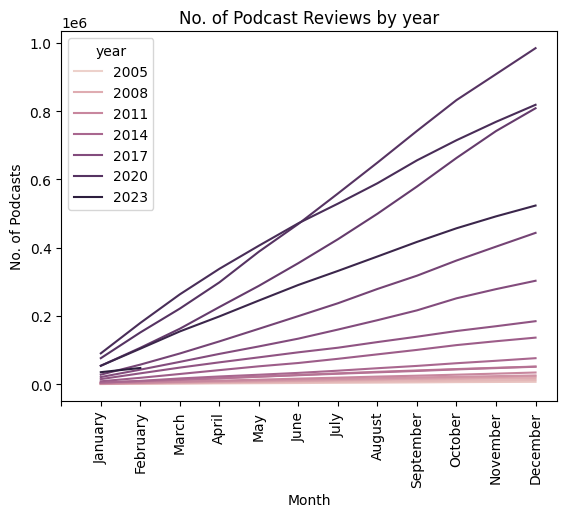

In [20]:
counts = df.groupby([df["year"], df["month"]])["podcast_id"].count()
counts_year = df.groupby([df["year"]])["podcast_id"].count()
cumulative_counts = counts.groupby(level=0).cumsum()
cumulative_counts = cumulative_counts.reset_index()

cumulative_counts.columns = ['year', 'month','cumulative_sum']

ax2=sns.lineplot(x='month', y='cumulative_sum', hue='year', data=cumulative_counts)
month_names = ['', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ax2.set_xticks(range(len(month_names)), month_names);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_title('No. of Podcast Reviews by year')
ax2.set_xlabel('Month')
ax2.set_ylabel('No. of Podcasts');

In [21]:
reviews_added = df.groupby(['podcast_id', 'rating']).size().reset_index(name='reviews_added')
df_merged = pd.merge(df, reviews_added, on=['podcast_id', 'rating'])
correlation = df_merged['rating'].corr(df_merged['reviews_added'])
print(correlation)


0.10441847626877294


Pearson correlation between the number of reviews added and the podcast ratings shows that there is not relationship.

##4. Statistical Inference

###Compare the mean of two groups



####Example

To Perform statistical inference, hypotheses can be formulated. One research question can be,
H0 (Null hypothesis): The mean ratings of podcasts in the 'Arts' category and the 'Music' category are equal.
Ha (Alternative hypothesis): The mean ratings of podcasts in the 'Arts' category and the 'Music' category are not equal.

Moreover, significance levels of 0.05 (5%) can be chosen and this determines the probability of rejecting the null hypothesis when it is actually true.

In [22]:
rating_data = df['rating']

art = rating_data[df['category'] == 'arts']
music = rating_data[df['category'] == 'music']

t_statistic, p_value = ttest_ind(art, music)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: -8.05273003351758
P-Value: 8.141634600121694e-16


The low p-value (3.095219191354355e-15) in the above output indicates that there is a strong evidence to reject the null hypothesis and suggests that there is a significant difference in ratings between the two categories.

###Difference of the population proportion of two groups

####Example

In this analysis, we are comparing the population proportions of podcasts in the 'sports' and 'news' categories. The aim of this example is to determine if there is a significant difference between the proportions of highly-rated podcasts (rating > 3) in these two categories.

The null hypothesis (H0) states that there is no significant difference between the proportions of highly-rated podcasts in the 'sports' and 'news' categories.

The alternative hypothesis (Ha) suggests that there is a significant difference between these proportions.

In [23]:
df_sport = df[df['category'] == 'sports']
df_news = df[df['category'] == 'news']

success_sport = df_sport[df_sport['rating'] > 3]['rating'].count()
trials_sport = df_sport['rating'].count()

success_news = df_news[df_news['rating'] > 3]['rating'].count()
trials_news = df_news['rating'].count()

z_score, p_value = proportions_ztest([success_sport, success_news], [trials_sport, trials_news])

diff_proportions = success_sport / trials_sport - success_news / trials_news

print("Difference in Population Proportions (sport - news):", diff_proportions)
print("Z-Score:", z_score)
print("P-Value:", p_value)


Difference in Population Proportions (sport - news): 0.08629142719022631
Z-Score: 71.740801345586
P-Value: 0.0


In the given analysis, the difference in population proportions (sport - news) is approximately 0.0877. The calculated z-score is 73.1360, and the resulting p-value is very low (p < 0.001). This indicates strong evidence to reject the null hypothesis and suggests a significant difference in the proportions of highly-rated podcasts between the 'sports' and 'news' categories.

####Using Confidence Interval

In [24]:
proportion_sport = success_sport / trials_sport
proportion_news = success_news / trials_news

se_sport = np.sqrt(proportion_sport * (1 - proportion_sport) / trials_sport)
se_news = np.sqrt(proportion_news * (1 - proportion_news) / trials_news)

confidence_level = 0.95
alpha = 1 - confidence_level

critical_value = stats.norm.ppf(1 - alpha / 2)

margin_of_error = critical_value * np.sqrt(se_sport**2 + se_news**2)

lower_ci = (proportion_sport - proportion_news) - margin_of_error
upper_ci = (proportion_sport - proportion_news) + margin_of_error

print("Confidence Interval:", (lower_ci, upper_ci))

Confidence Interval: (0.08395858095175354, 0.08862427342869908)


Based on the provided confidence interval (0.0853, 0.0899) and assuming a significance level of 0.05, we can make the following conclusion regarding the null hypothesis:

Since the confidence interval does not contain the value of 0, we can conclude that the difference in population proportions between the 'sports' and 'news' categories is statistically significant at a 5% significance level. Therefore, we would reject the null hypothesis, which states that there is no difference in the population proportions of positive ratings between the two categories.


##5. Analysis using Google Studio

Since our database is big, we will extract the top 100000 observations as csv file from FULL JOIN of the Category and the review table to be used in Google Studio.

In [25]:
conn = sqlite3.connect('database.sqlite')
cursor = conn.cursor()

cursor.execute('''SELECT c.podcast_id,
                          c.category,
                          r.title AS rating_title,
                          r.content,
                          r.rating,
                          r.author_id,
                          r.created_at
                  FROM categories c
                  LEFT JOIN reviews r ON c.podcast_id = r.podcast_id

                  UNION ALL

                  SELECT r.podcast_id,
                          c.category,
                          r.title AS rating_title,
                          r.content,
                          r.rating,
                          r.author_id,
                          r.created_at
                  FROM reviews r
                  LEFT JOIN categories c ON c.podcast_id = r.podcast_id
                  WHERE c.podcast_id IS NULL
                  LIMIT 100000''')

rows = cursor.fetchall()

csv_file = 'merged.csv'

with open(csv_file, 'w', newline='') as f:

    writer = csv.writer(f)


    column_names = [description[0] for description in cursor.description]
    writer.writerow(column_names)


    writer.writerows(rows)

conn.close()

print('Conversion complete. CSV file saved as', csv_file)


Conversion complete. CSV file saved as merged.csv


**Input from Google Studio**

![Picture](https://drive.google.com/uc?id=15GvgJ2hOwNU30F3-YkYfF9NVWUJdhorl)

In [ ]:
ax3=sns.countplot(y='rating_title', data=df)
ax3.set_ylabel("Title of Ratings")
ax3.set_xlabel("No");

The above graph shows that the majority of the audience for the podcast wrote their title Great Podcast.

![Picture](https://drive.google.com/uc?id=1JWPGfrzz3Ity7nz4zdGdE-yyHAQbbypC)

The graph above illustrates an increase in the number of podcast reviews over time for the first 100000 observation of the merged table between review and category table.

![Picture](https://drive.google.com/uc?id=12n1p4d1kHl5pcb0Rvp1_vcnSeaZz3MdL)

The above plot shows the highest number reviews received for rating 5 by category. This plot shows that arts podcasts have the highest number of rating in the top 100000 observations of the dataset.